In [1]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import os
import re
import matplotlib.pyplot as plt
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})
from FVSimulation_phase_density.Finite_volume_method_1D import *

In [2]:
chippath = '../DataKian/bTa_LT278W2chip5/'
lambdanm = 402
filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
length = 90

KID = KID_data(chippath,lambdanm,filename,length)

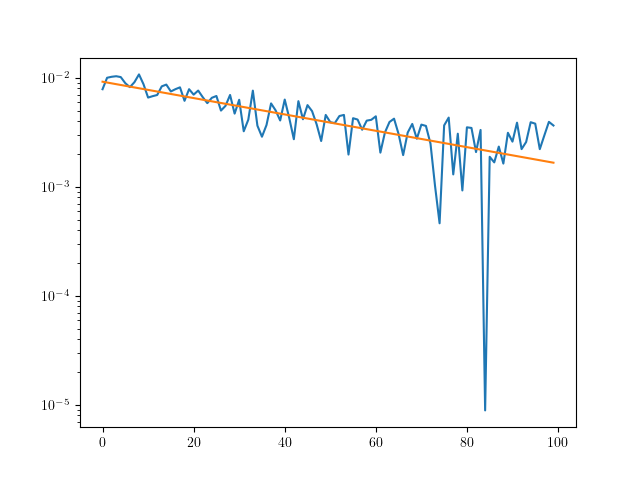

In [3]:
KID.fit_tail(start=150,end=250)

In [15]:
offset = 1
simtime = 30
indmin = 100 + offset
indmax = 100 + simtime-1 + offset
fitdatax = KID.t_full[indmin:indmax]-indmin
fitdatay = KID.phase[indmin:indmax]

simlist_D = []
for D in np.geomspace(1,1000,10):
    simlist_D.append(KID_sim(KID,D,200,0.01,1/4,start_offset=offset,simtime_approx=simtime))
simlist_K = []
for K in np.geomspace(1,500,10):
    simlist_K.append(KID_sim(KID,50,K,0.1,1/4,start_offset=offset,simtime_approx=simtime))

100%|██████████| 300/300 [00:00<00:00, 456.60it/s]


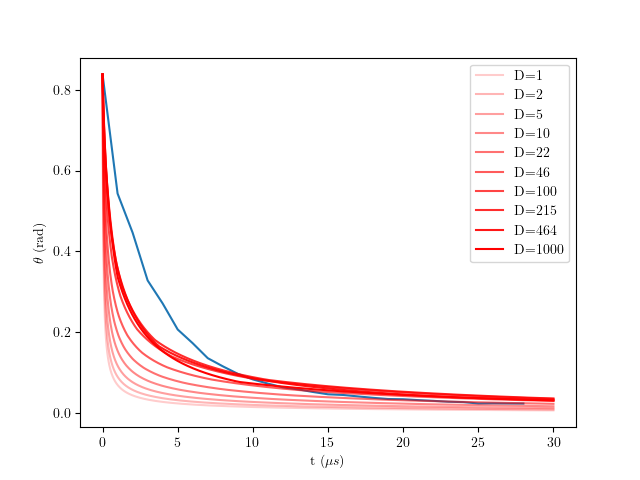

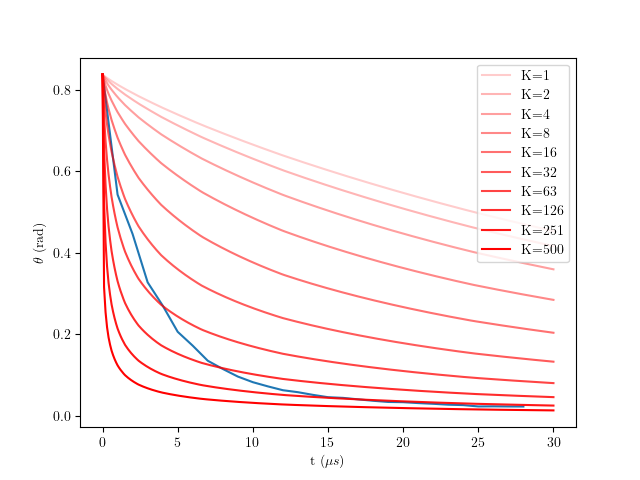

In [20]:
plt.figure()
plt.plot(fitdatax,fitdatay)
alphalist = np.linspace(0.2,1,10)
for SIM,alpha in zip(simlist_D,alphalist):
    plt.plot(SIM.t_axis,SIM.timeseriestheta,label=f'D={round(SIM.D)}',c='r',alpha=alpha)
plt.legend()
plt.ylabel(r'$\theta$ (rad)')
plt.xlabel(r't $(\mu s)$')
plt.show()
plt.figure()
plt.plot(fitdatax,fitdatay)
for SIM,alpha in zip(simlist_K,alphalist):
    plt.plot(SIM.t_axis,SIM.timeseriestheta,label=f'K={round(SIM.K)}',c='r',alpha=alpha)
plt.legend()
plt.ylabel(r'$\theta$ (rad)')
plt.xlabel(r't $(\mu s)$')
plt.show()